In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
true = pd.read_csv("True.csv")

In [ ]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
true.shape

(21417, 4)

In [ ]:
fake = pd.read_csv('Fake.csv')
fake.shape

(23481, 4)

In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

In [ ]:
df = pd.concat(frames)

In [ ]:
df.shape

(10002, 5)

In [ ]:
df.tail()

,title,text,subject,date,label
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",0
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",0
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",0
4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0
5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0


In [ ]:
X = df. drop('label', axis=1)
y = df['label']

In [ ]:
df = df.dropna()
df2 = df.copy()

In [ ]:
df2.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df2['title'][2]

"Senior U.S. Republican senator: 'Let Mr. Mueller do his job'"

DATA PROCESSING

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [ ]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

MODEL BUILDING

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.999


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


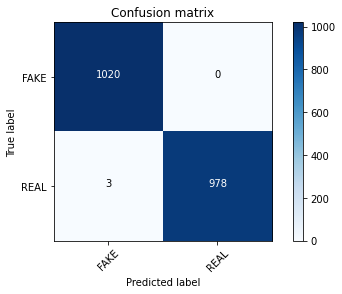

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [ ]:
val = tfidf_v.transform([review]).toarray()

In [ ]:
classifier.predict(val)

array([0])

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier, open('model2.pkl', 'wb'))

In [ ]:
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [ ]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))

In [ ]:
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [ ]:
val_pkl = joblib_vect.transform([review]).toarray()

In [ ]:
joblib_model.predict(val_pkl)

array([0])

FLASK

In [ ]:
pip install virtualenv

     |████████████████████████████████| 5.3 MB 32.2 MB/s 
     |████████████████████████████████| 338 kB 50.0 MB/s 


In [ ]:
import os
os.mkdir('templates')
os.mkdir('static')

In [ ]:
pip install flask

In [ ]:
pip install flask-ngrok

In [52]:
index ='''
<!DOCTYPE HTML>
<html>
<head>
 <meta charset="utf-8">
 <meta http-equiv="X-UA-Compatible" content="IE=edge">
 <title>Fake News Prediction</title>
 <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/css/bootstrap.min.css" rel="stylesheet"
  integrity="sha384-EVSTQN3/azprG1Anm3QDgpJLIm9Nao0Yz1ztcQTwFspd3yD65VohhpuuCOmLASjC" crossorigin="anonymous">
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/js/bootstrap.bundle.min.js"
  integrity="sha384-MrcW6ZMFYlzcLA8Nl+NtUVF0sA7MsXsP1UyJoMp4YLEuNSfAP+JcXn/tWtIaxVXM"
  crossorigin="anonymous"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.1.1/jquery.min.js"></script>
</head>
<body>
 <nav class="navbar navbar-expand-lg navbar-light bg-light">
  <div class="container-fluid">
   <a class="navbar-brand" href="/">FAKE NEWS PREDICTION</a>
   <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarNavAltMarkup"
    aria-controls="navbarNavAltMarkup" aria-expanded="false" aria-label="Toggle navigation">
    <span class="navbar-toggler-icon"></span>
   </button>
  </div>
 </nav>
<br>
 <p style=text-align:center>A fake news prediction web application using Machine Learning algorithms </p>
 <p style=text-align:center>Enter your URL and try it.</p>
 <br>
 <div class='container'>
  <form action="/" method="POST">
   <div class="col-three-forth text-center col-md-offset-2">
    <div class="form-group">
    <form action="/" method="GET">
		  URL: <input name="url" type="url" align="left" placeholder="Enter the url here"><br>
      <p>{{url}}</p>
      <br>
      <br>
    <button class="btn btn-primary btn-outline btn-md"  type="submit" name="content">PREDICT</button><br>
     <p class="form-control jTextarea mt-3" id="jTextarea'" rows="5" name="text"
      placeholder="your content will be display here..." required>{{text}}</p>
<br><br>
     
    </div>
   </div>
  </form>
 </div>
 <br>
 {% if result %}
 <p style="text-align:center" ><strong>Prediction : {{result}}</strong></p>
 {% endif %}
<script>
     function growTextarea (i,elem) {
    var elem = $(elem);
    var resizeTextarea = function( elem ) {
        var scrollLeft = window.pageXOffset || (document.documentElement || document.body.parentNode || document.body).scrollLeft;
        var scrollTop  = window.pageYOffset || (document.documentElement || document.body.parentNode || document.body).scrollTop;  
        elem.css('height', 'auto').css('height', elem.prop('scrollHeight') );
          window.scrollTo(scrollLeft, scrollTop);
      };
      elem.on('input', function() {
        resizeTextarea( $(this) );
      });
      resizeTextarea( $(elem) );
      
  }
  
  $('.jTextarea').each(growTextarea);
</script>
</body>
</html>
'''
file = open("templates/index.html","w")
file.write(index)
file.close()

In [46]:
pip install newspaper3k

     |████████████████████████████████| 211 kB 23.6 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 7.4 MB 56.1 MB/s 
     |████████████████████████████████| 81 kB 9.2 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=5dff5a6bc4605abc4bac82307811ecb60895ab00e626a1b5d8fd05ac4d6e10ad
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=c4ffb7e14903398b41b389e452ab26dd644cc9b698a7cb74c527e3ced0fdb3fd
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=d08d97ce1751e78cca6e14b8f58593e47381c84854864ad755874e1baa113b0c
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

In [ ]:
from flask import Flask, render_template, request, jsonify
from flask_ngrok import run_with_ngrok
import nltk
import pickle
import urllib
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from newspaper import Article
app = Flask(__name__)
run_with_ngrok(app)
ps = PorterStemmer()
# Load model and vectorizer
model = pickle.load(open('model2.pkl', 'rb'))
tfidfvect = pickle.load(open('tfidfvect2.pkl', 'rb'))
# Build functionalities
@app.route('/', methods=['GET'])
def home():
    return render_template('index.html') 
def content(url):
    article = Article(url)
    article.download()
    article.parse()
    author=article.authors
    text_content=article.text
    return text_content
    
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidfvect.transform([review]).toarray()
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction
@app.route('/', methods=['POST'])
def webapp():
    url=request.form['url']
    text= content(url)
    prediction = predict(text)
    return render_template('index.html', text=text,url=url,result=prediction)
@app.route('/predict/', methods=['GET','POST'])
def api():
    url=request.args.get("url")
    text = request.args.get("text")
    prediction = predict(text)
    return jsonify(prediction=prediction)
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3ea8-35-199-58-141.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [22/Sep/2021 08:58:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 08:58:42] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2021 08:58:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 08:58:59] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 08:59:26] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 10:02:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 10:02:32] "GET /favicon.ico HTTP/1.1" 404 -
